# NY Rodent Inspection

## Introducción

Conjunto de datos contiene información sobre inspecciones de ratas.El Portal de información de ratas (RIP, por sus siglas en inglés) es una aplicación de mapeo basada en la web donde los usuarios pueden ver los datos de inspección de ratas. 

Los datos son emitidos por el Departamento de Salud e Higiene Mental de la Ciudad de Nueva York (DOHMH), División de Base de Datos de Control de Plagas de Salud Ambiental, los cuales tomamos de la pagina [Open Data for All New Yorkers](https://data.cityofnewyork.us/Health/Rodent-Inspection/p937-wjvj) y su actualización es **diaria**.

Sobre de los datos: tenga en cuenta que si una propiedad no aparece en el archivo, eso no indica la ausencia de ratas, sino que simplemente no se ha inspeccionado. Es posible también que los vecindarios con un mayor número de propiedades con signos activos de ratas no tengan una mayor población de ratas, sino que simplemente tengan más inspecciones.

## Análisis exploratorio inicial

In [22]:
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

import sys
sys.path.append('../src/utils')

from matplotlib.ticker import FuncFormatter
#from eda_prepare import *

In [2]:
data = pd.read_csv('../../data/Rodent_Inspection.csv')

In [3]:
data.dataframeName = 'Rodent_Inspection.csv'
nRow, nCol = data.shape
print(f'Tenemos {nRow} renglones y {nCol} columnas')

Tenemos 2007833 renglones y 20 columnas


In [4]:
data.head()

,INSPECTION_TYPE,JOB_TICKET_OR_WORK_ORDER_ID,JOB_ID,JOB_PROGRESS,BBL,BORO_CODE,BLOCK,LOT,HOUSE_NUMBER,STREET_NAME,ZIP_CODE,X_COORD,Y_COORD,LATITUDE,LONGITUDE,BOROUGH,INSPECTION_DATE,RESULT,APPROVED_DATE,LOCATION
0,Initial,13252142,PC7732347,1,2024090050,2,2409,50,0000,MELROSE AVENUE,NaN,NaN,NaN,0.0,0.0,Bronx,07/07/2021 10:05:45 AM,Failed for Other R,07/09/2021 11:33:07 AM,"(0.0, 0.0)"
1,Compliance,12802045,PC7500960,2,5011840160,5,1184,160,000,WENLOCK STREET,NaN,NaN,NaN,0.0,0.0,Staten Island,11/10/2011 02:50:52 PM,Failed for Other R,11/14/2011 03:28:40 PM,"(0.0, 0.0)"
2,Compliance,12990129,PC7054124,2,3089140016,3,8914,16,000,Abbey Court,NaN,0.0,0.0,0.0,0.0,Brooklyn,09/26/2017 02:00:25 PM,Passed,09/27/2017 12:58:55 PM,NaN
3,Initial,12328443,PC6737067,1,2025390132,2,2539,132,10,MAJ WM DEEGAN BLVD,NaN,1003704.0,240136.0,0.0,0.0,Bronx,09/12/2017 02:45:42 PM,Passed,09/14/2017 02:41:03 PM,"(0.0, 0.0)"
4,Initial,11362643,PC7466087,1,5002210035,5,221,35,000,Roe Street,NaN,950510.0,169320.0,0.0,0.0,Staten Island,06/02/2016 03:08:18 PM,Passed,06/07/2016 02:35:38 PM,"(0.0, 0.0)"


Veamos los valores `NA's`

In [5]:
data.isnull().sum()

INSPECTION_TYPE                     0
JOB_TICKET_OR_WORK_ORDER_ID         0
JOB_ID                              0
JOB_PROGRESS                        0
BBL                                 0
BORO_CODE                           0
BLOCK                               0
LOT                                 0
HOUSE_NUMBER                    48758
STREET_NAME                      5483
ZIP_CODE                        11154
X_COORD                        123209
Y_COORD                        123209
LATITUDE                         6754
LONGITUDE                        6754
BOROUGH                           103
INSPECTION_DATE                    17
RESULT                             13
APPROVED_DATE                    1633
LOCATION                         7397
dtype: int64

In [6]:
data.columns

Index(['INSPECTION_TYPE', 'JOB_TICKET_OR_WORK_ORDER_ID', 'JOB_ID',
       'JOB_PROGRESS', 'BBL', 'BORO_CODE', 'BLOCK', 'LOT', 'HOUSE_NUMBER',
       'STREET_NAME', 'ZIP_CODE', 'X_COORD', 'Y_COORD', 'LATITUDE',
       'LONGITUDE', 'BOROUGH', 'INSPECTION_DATE', 'RESULT', 'APPROVED_DATE',
       'LOCATION'],
      dtype='object')

In [7]:
data.dtypes

INSPECTION_TYPE                 object
JOB_TICKET_OR_WORK_ORDER_ID      int64
JOB_ID                          object
JOB_PROGRESS                     int64
BBL                              int64
BORO_CODE                        int64
BLOCK                            int64
LOT                              int64
HOUSE_NUMBER                    object
STREET_NAME                     object
ZIP_CODE                       float64
X_COORD                        float64
Y_COORD                        float64
LATITUDE                       float64
LONGITUDE                      float64
BOROUGH                         object
INSPECTION_DATE                 object
RESULT                          object
APPROVED_DATE                   object
LOCATION                        object
dtype: object

In [8]:
data.describe(exclude=[np.number])

,INSPECTION_TYPE,JOB_ID,HOUSE_NUMBER,STREET_NAME,BOROUGH,INSPECTION_DATE,RESULT,APPROVED_DATE,LOCATION
count,2007833,2007833,1959075,2002350,2007730,2007816,2007820,2006200,2000436
unique,5,1445313,21308,12082,5,1951381,7,1077711,311840
top,Initial,PC6522897,15,BROADWAY,Manhattan,10/01/2011 12:00:00 PM,Passed,08/13/2010 04:09:45 PM,"(0.0, 0.0)"
freq,1416858,175,4875,27281,641019,30,1233859,61,10394


In [11]:
def tit(col):
    return col.lower().replace('/', '_').replace(' ', '_').replace('ñ', 'n')

def clean_column(data):
    data.rename(columns={col: tit(col) for col in data.columns.values}, inplace=True)
    return data

def changeType_date(df):
    df['inspection_date'] = pd.to_datetime(df['inspection_date'])
    df['approved_date'] = pd.to_datetime(df['approved_date'])
    return df

def lowercase(df):
    df['inspection_type'] = df.inspection_type.str.lower()
    df['street_name'] = df.street_name.str.lower()
    #df['result'] = df.result.str.lower()
    return df

def changeType_date(df):
    df['inspection_date'] = pd.to_datetime(df['inspection_date'])
    return df

def fix_dates(df):
    """Fixes date format"""
    listFecha = ["inspection_date"]
    date_format = "mm/dd/aaaa"
    type_format = '%m/%d/%Y'
    
    listFecha2 = ["approved_date"]
    date_format = "mm/dd/aaaa"
    type_format = '%m/%d/%Y'

    changeType_date(df,listFecha, type_format)
    changeType_date(df,listFecha2, type_format)
    
    return df

def imputations(df):
    """Imputations of missing data"""
    df.house_number.mask(df.house_number.isna(), '0', inplace=True)
    df.street_name.mask(df.street_name.isna(), 'No especificado', inplace=True)
    df.zip_code.mask(df.zip_code.isna(), '0', inplace=True)
    df.x_coord.mask(df.x_coord.isna(), '0', inplace=True)
    df.y_coord.mask(df.y_coord.isna(), '0', inplace=True)
    df.latitude.mask(df.latitude.isna(), '0', inplace=True)
    df.longitude.mask(df.longitude.isna(), '0', inplace=True)
    df.borough.mask(df.borough.isna(), 'No especificado', inplace=True)
    df.result.mask(df.result.isna(), 'desconocido', inplace=True)
    df.location.mask(df.location.isna(), '(0.0, 0.0)', inplace=True)

    return df

def cleanning(df):
    df = clean_column(df)
    df = changeType_date(df)
    df = lowercase(df)
    df = imputations(df)
    return df

In [12]:
data = cleanning(data)

In [13]:
data.head()

,inspection_type,job_ticket_or_work_order_id,job_id,job_progress,bbl,boro_code,block,lot,house_number,street_name,zip_code,x_coord,y_coord,latitude,longitude,borough,inspection_date,result,approved_date,location
0,initial,13252142,PC7732347,1,2024090050,2,2409,50,0000,melrose avenue,0,0,0,0.0,0.0,Bronx,2021-07-07 10:05:45,Failed for Other R,07/09/2021 11:33:07 AM,"(0.0, 0.0)"
1,compliance,12802045,PC7500960,2,5011840160,5,1184,160,000,wenlock street,0,0,0,0.0,0.0,Staten Island,2011-11-10 14:50:52,Failed for Other R,11/14/2011 03:28:40 PM,"(0.0, 0.0)"
2,compliance,12990129,PC7054124,2,3089140016,3,8914,16,000,abbey court,0,0.0,0.0,0.0,0.0,Brooklyn,2017-09-26 14:00:25,Passed,09/27/2017 12:58:55 PM,"(0.0, 0.0)"
3,initial,12328443,PC6737067,1,2025390132,2,2539,132,10,maj wm deegan blvd,0,1003704.0,240136.0,0.0,0.0,Bronx,2017-09-12 14:45:42,Passed,09/14/2017 02:41:03 PM,"(0.0, 0.0)"
4,initial,11362643,PC7466087,1,5002210035,5,221,35,000,roe street,0,950510.0,169320.0,0.0,0.0,Staten Island,2016-06-02 15:08:18,Passed,06/07/2016 02:35:38 PM,"(0.0, 0.0)"


## Análisis grafico exploratorio inicial

In [15]:
print(data['result'].unique())

['initial' 'compliance' 'bait' 'stoppage' 'clean_ups']


NameError: name 'number_formatter' is not defined

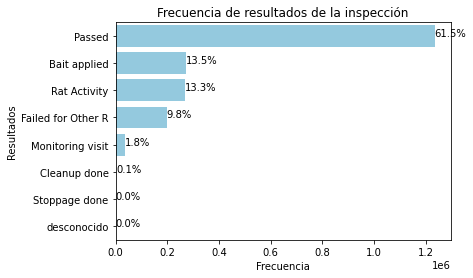

In [31]:

a = sns.countplot(y="result", data=data,
                  order = data['result'].value_counts().index, color="skyblue")
a.set_title("Frecuencia de resultados de la inspección")
a.set_ylabel("Resultados")
a.set_xlabel("Frecuencia")

total = len(data['result'])
for p in a.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        a.annotate(percentage, (x, y))
        
a.xaxis.set_major_formatter(FuncFormatter(number_formatter))
plt.show()